# Importation of the required libraries

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Load the dataset with pandas

In [2]:
df = pd.read_csv('../data/crop_recommendation.csv')

# Exploration of the dataset
- Basic information about the dataset

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(1500, 8)

In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df['label'].unique()

array(['rice', 'maize', 'kidneybeans', 'pigeonpeas', 'mungbean', 'banana',
       'mango', 'grapes', 'watermelon', 'apple', 'orange', 'papaya',
       'coconut', 'cotton', 'coffee'], dtype=object)

In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df['label'].value_counts()

rice           100
maize          100
kidneybeans    100
pigeonpeas     100
mungbean       100
banana         100
mango          100
grapes         100
watermelon     100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
coffee         100
Name: label, dtype: int64

### Observations about the training data
- 1500 rows 
- no missing data
- Each crop has about 100 entries i.e. charactristics 

# Prepare the dataset for training
- Define the features and targets from the dataset

In [9]:
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [10]:
acc = []
model = []

## Split training & validation set
__We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.
Since the test set and training set have the same date ranges, we can pick a random 20% fraction.__

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        25
 kidneybeans       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        22
    mungbean       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        18
  pigeonpeas       1.00      1.00      1.00        19
        rice       1.00      1.00      1.00        17
  watermelon       1.00      1.00      1.00        17

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00 

In [13]:
from sklearn.model_selection import cross_val_score

## Cross validation score for the decision tree

In [14]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [15]:
score

array([1.        , 0.99333333, 0.99333333, 0.99666667, 0.99666667])

## Saving the trainied model

In [16]:
import pickle
# Dump the trained decision tree classifier with Pickle
DT_pkl_filename = '../model/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        25
 kidneybeans       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        22
    mungbean       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        18
  pigeonpeas       1.00      1.00      1.00        19
        rice       1.00      1.00      1.00        17
  watermelon       1.00      1.00      1.00        17

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00     

In [18]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1.        , 0.99666667, 1.        , 1.        , 1.        ])

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../model/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector machine

In [20]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        25
 kidneybeans       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        22
    mungbean       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        18
  pigeonpeas       1.00      1.00      1.00        19
        rice       1.00      1.00      1.00        17
  watermelon       1.00      1.00      1.00        17

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
we

In [21]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.99333333, 0.97666667, 0.99      , 0.99666667, 1.        ])

In [22]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../model/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.99
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        21
      cotton       0.95      0.90      0.93        21
      grapes       1.00      1.00      1.00        25
 kidneybeans       1.00      1.00      1.00        20
       maize       0.88      0.94      0.91        16
       mango       1.00      1.00      1.00        22
    mungbean       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        18
  pigeonpeas       1.00      1.00      1.00        19
        rice       1.00      1.00      1.00        17
  watermelon       1.00      1.00      1.00        17

    accuracy                           0.99       300
   macro avg       0.99      0.99      

In [24]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([1.        , 0.98666667, 0.98333333, 0.99      , 0.97666667])

In [25]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../model/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        25
 kidneybeans       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        22
    mungbean       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        18
  pigeonpeas       1.00      1.00      1.00        19
        rice       1.00      1.00      1.00        17
  watermelon       1.00      1.00      1.00        17

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
wei

In [27]:
score = cross_val_score(RF,features,target,cv=5)
score

array([1.        , 0.99333333, 1.        , 1.        , 1.        ])

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../model/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Accuracy comparision 

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

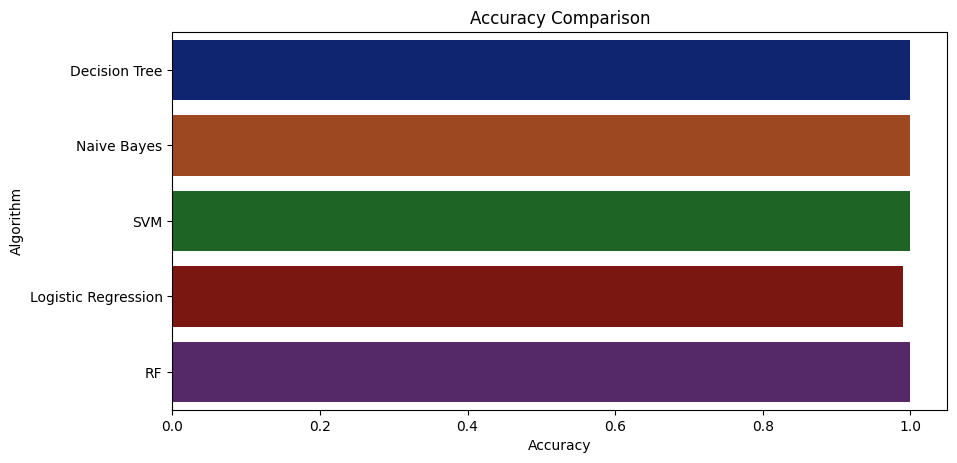

In [29]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [30]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 1.0
SVM --> 1.0
Logistic Regression --> 0.99
RF --> 1.0


# Making sample predictions

In [31]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [32]:
data = np.array([[70, 44, 19, 23, 70.3, 5.0, 90.9]])
prediction = RF.predict(data)
print(prediction)

['maize']
